In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

In [2]:
np.random.seed(19973001)

In [3]:
spread = np.random.rand(50) * 100
center = np.ones(25) * 50
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
data = np.concatenate((spread, center, flier_high, flier_low))

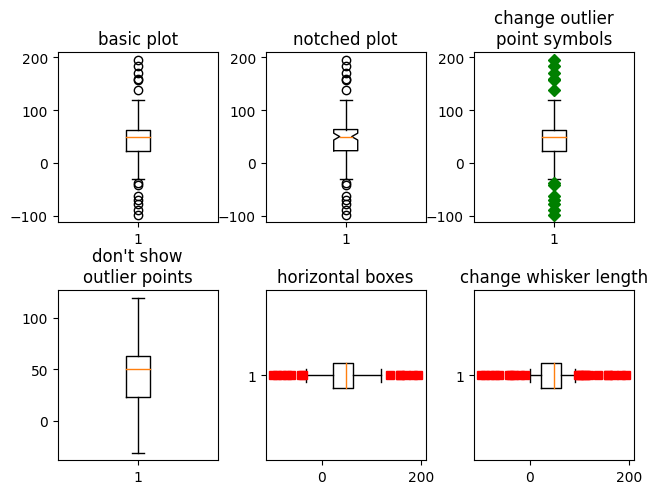

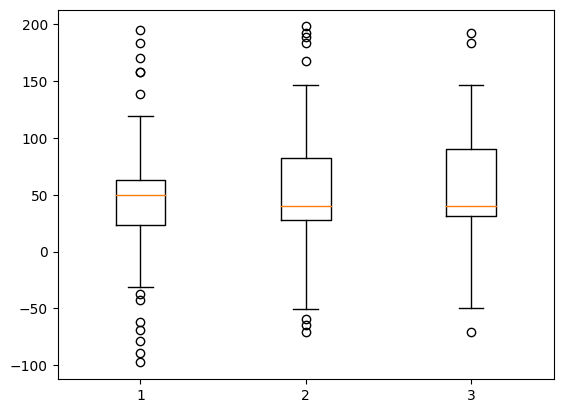

In [4]:
fig, axs = plt.subplots(2, 3)

# basic plot
axs[0, 0].boxplot(data)
axs[0, 0].set_title("basic plot")

# notched plot
axs[0, 1].boxplot(data, 1)
axs[0, 1].set_title("notched plot")

# change outlier point symbols
axs[0, 2].boxplot(data, 0, "gD")
axs[0, 2].set_title("change outlier\npoint symbols")

# don't show outlier points
axs[1, 0].boxplot(data, 0, "")
axs[1, 0].set_title("don't show\noutlier points")

# horizontal boxes
axs[1, 1].boxplot(data, 0, "rs", 0)
axs[1, 1].set_title("horizontal boxes")

# change whisker length
axs[1, 2].boxplot(data, 0, "rs", 0, 0.75)
axs[1, 2].set_title("change whisker length")

fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9, hspace=0.4, wspace=0.3)

spread = np.random.rand(50) * 100
center = np.ones(25) * 40
flier_high = np.random.rand(10) * 100 + 100
flier_low = np.random.rand(10) * -100
d2 = np.concatenate((spread, center, flier_high, flier_low))

# making a 2-D array only works if all the columns are the same length
# if they are not, then use a list instead this is actually more efficient
# because boxplot converts a 2-D array into a list of vectors internally anyway
data = [data, d2, d2[::2]]

# multiple boxplots on one axes
fig, ax = plt.subplots()
ax.boxplot(data)

plt.show()

In [5]:
random_dists = [
    "Normal(1, 1)", "Lognormal(1, 1)", "Exp(1)",
    "Gumbel(6, 4)", "Triangular(2, 9, 11)",
]
n = 100

norm = np.random.normal(1, 1, n)
logn = np.random.lognormal(1, 1, n)
expo = np.random.exponential(1, n)
gumb = np.random.gumbel(6, 4, n)
tria = np.random.triangular(2, 9, 11, n)

# generate some random indices that we'll use to resample the original data arrays
# for code brevity, just use the same random indices for each array
bootstrap_indices = np.random.randint(0, n, n)
data = [
    norm, norm[bootstrap_indices],
    logn, logn[bootstrap_indices],
    expo, expo[bootstrap_indices],
    gumb, gumb[bootstrap_indices],
    tria, tria[bootstrap_indices],
]

box_colors = ["darkkhaki", "royalblue"]
num_boxes = len(data)
medians = np.empty(num_boxes)

pos = np.arange(num_boxes) + 1
upper_labels = [str(round(s, 2)) for s in medians]
weights = ["bold", "semibold"]

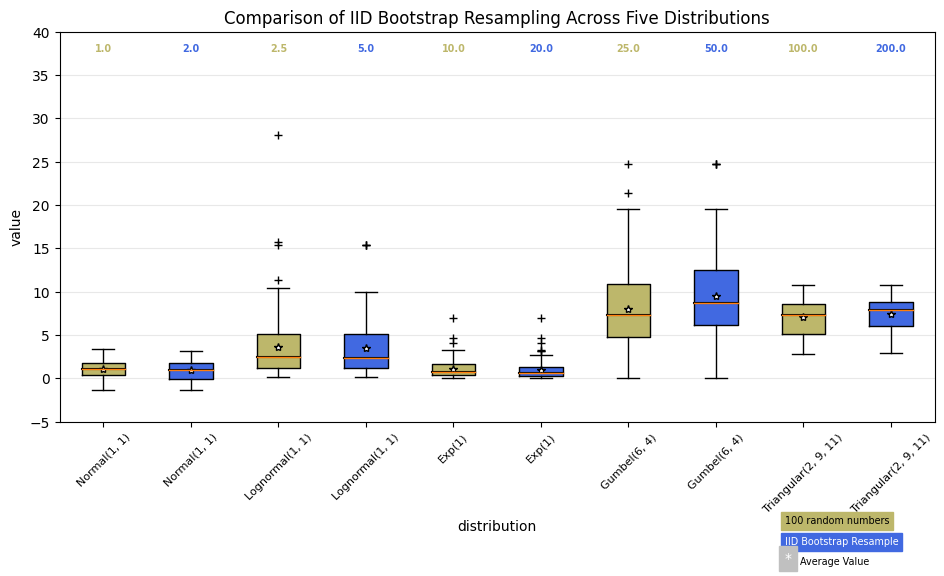

In [6]:
fig, ax1 = plt.subplots(figsize=(10, 6))
fig.canvas.manager.set_window_title("cool boxplot")
fig.subplots_adjust(left=0.075, right=0.95, top=0.9, bottom=0.25)

bp = ax1.boxplot(data, notch=False, sym="+", vert=True, whis=1.5)
plt.setp(bp["boxes"], color="black")
plt.setp(bp["whiskers"], color="black")
plt.setp(bp["fliers"], color="red", marker="+")

# add a horizontal grid to the plot, but make it very light in color
# so we can use it for reading data values but not be distracting
ax1.yaxis.grid(True, linestyle="-", which="major", color="lightgrey", alpha=0.5)

ax1.set(
    axisbelow=True, # hide the grid behind plot objects
    title="Comparison of IID Bootstrap Resampling Across Five Distributions",
    xlabel="distribution",
    ylabel="value",
)

# now fill the boxes with desired colors
for i in range(num_boxes):
    box = bp["boxes"][i]
    box_x = []
    box_y = []
    
    for j in range(5):
        box_x.append(box.get_xdata()[j])
        box_y.append(box.get_ydata()[j])
    
    box_coords = np.column_stack([box_x, box_y])
    # alternate between Dark Khaki and Royal Blue
    ax1.add_patch(Polygon(box_coords, facecolor=box_colors[i % 2]))
    # now draw the median lines back over what we just filled in
    med = bp["medians"][i]
    median_x = []
    median_y = []
    
    for j in range(2):
        median_x.append(med.get_xdata()[j])
        median_y.append(med.get_ydata()[j])
        ax1.plot(median_x, median_y, "k")
    
    medians[i] = median_y[0]
    
    # finally, overplot the sample averages, with horizontal alignment in the center of each box
    ax1.plot(
        np.average(med.get_xdata()), np.average(data[i]),
        color="w", marker="*", markeredgecolor="k"
    )

# set the axes ranges and axes labels
ax1.set_xlim(0.5, num_boxes + 0.5)
top = 40
bottom = -5
ax1.set_ylim(bottom, top)
ax1.set_xticklabels(np.repeat(random_dists, 2), rotation=45, fontsize=8)

# due to the y-axis scale being different across samples,
# it can be hard to compare differences in medians across the samples
# add upper x-axis tick labels with the sample medians to aid in comparison
# (just use two decimal places of precision)
for tick, label in zip(range(num_boxes), ax1.get_xticklabels()):
    k = tick % 2
    ax1.text(
        pos[tick], 0.95, upper_labels[tick], transform=ax1.get_xaxis_transform(),
        horizontalalignment="center", size="x-small",
        weight=weights[k], color=box_colors[k],
    )

# finally, add a basic legend
fig.text(
    0.80, 0.08, f"{n} random numbers", backgroundcolor=box_colors[0],
    color="black", weight="roman", size="x-small",
)
fig.text(
    0.80, 0.045, "IID Bootstrap Resample", backgroundcolor=box_colors[1],
    color="white", weight="roman", size="x-small",
)
fig.text(
    0.80, 0.015, "*", color="white", backgroundcolor="silver", weight="roman", size="medium",
)
fig.text(
    0.815, 0.013, "Average Value", color="black", weight="roman", size="x-small",
)

plt.show()

In [7]:
def fake_bootstraper(n):
    """
    This is just a placeholder for the user's method of
    bootstrapping the median and its confidence intervals.
    
    Returns an arbitrary median and confidence interval packed into a tuple.
    """
    if n == 1:
        med = 0.1
        ci = (-0.25, 0.25)
    else:
        med = 0.2
        ci = (-0.35, 0.50)
    
    return med, ci

In [8]:
inc = 0.1
e1 = np.random.normal(0, 1, size=500)
e2 = np.random.normal(0, 1, size=500)
e3 = np.random.normal(0, 1 + inc, size=500)
e4 = np.random.normal(0, 1 + 2 * inc, size=500)

treatments = [e1, e2, e3, e4]
med1, c1 = fake_bootstraper(1)
med2, c2 = fake_bootstraper(2)
medians = [None, None, med1, med2]
conf_intervals = [None, None, c1, c2]

pos = np.arange(len(treatments)) + 1

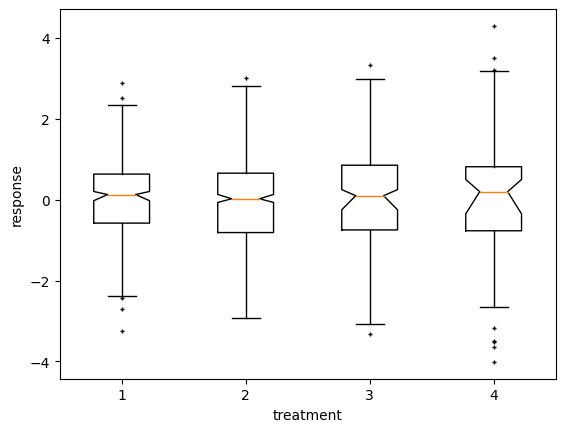

In [9]:
fig, ax = plt.subplots()

bp = ax.boxplot(
    treatments, sym="k+", positions=pos, notch=True, bootstrap=5000,
    usermedians=medians, conf_intervals=conf_intervals,
)
ax.set_xlabel("treatment")
ax.set_ylabel("response")
plt.setp(bp["whiskers"], color="k", linestyle="-")
plt.setp(bp["fliers"], markersize=3)

plt.show()

In [10]:
x = np.linspace(-7, 7, 140)
x = np.hstack([-25, x, 25])

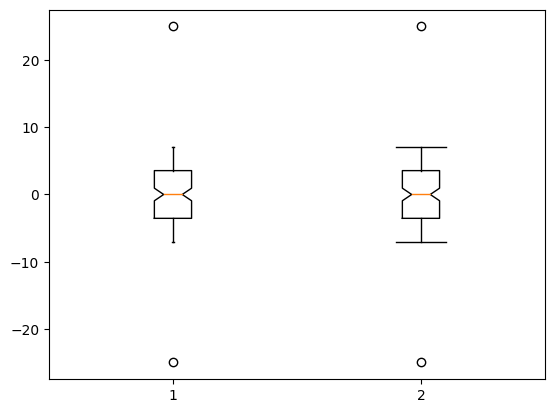

In [11]:
fig, ax = plt.subplots()
ax.boxplot([x, x], notch=True, capwidths=[0.01, 0.2])
plt.show()